In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import matplotlib.colors as mcolors
from dateutil import parser

# Import Scikit-learn for Machine Learning libraries
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, RandomForestRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.manifold import TSNE
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score,f1_score

In [2]:
df = pd.read_csv('train.csv')
df.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [16]:
import os
os.chdir(r'C:\Users\arunk\Assignments\ASSESSMENT COMPLETION\Machine_learning_Assessment\Answer_6')
os.getcwd()
# os.path.pardir
os.chdir('../')
os.listdir()

['.pytest_cache',
 '.vscode',
 'Answer_1',
 'Answer_2',
 'Answer_3',
 'Answer_4',
 'Answer_5',
 'Answer_6',
 'Answer_7',
 'env',
 'requirements.txt']

In [43]:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

1 Data Cleaning and Data Prep

In [3]:
# Handling duplicates
duplicate_row_df = df[df.duplicated()]
duplicate_row_df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status


In [4]:
# Unique values
df.nunique()

Loan_ID              614
Gender                 2
Married                2
Dependents             4
Education              2
Self_Employed          2
ApplicantIncome      505
CoapplicantIncome    287
LoanAmount           203
Loan_Amount_Term      10
Credit_History         2
Property_Area          3
Loan_Status            2
dtype: int64

In [85]:
# Missing values ratio 
data_na = (df.isnull().sum() / len(df)) * 100
data_na = data_na.drop(data_na[data_na == 0].index).sort_values(ascending=False)
if not data_na.empty:
   na_column_to_drop = list(data_na[data_na>=20].index)
   





Credit_History      8.143322
Self_Employed       5.211726
LoanAmount          3.583062
Dependents          2.442997
Loan_Amount_Term    2.280130
Gender              2.117264
Married             0.488599
dtype: float64


In [7]:
# Missing values ratio 
data_na = (df.isnull().sum() / len(df)) * 100
data_na = data_na.drop(data_na[data_na == 0].index).sort_values(ascending=False)

data_na>=5

Credit_History       True
Self_Employed        True
LoanAmount          False
Dependents          False
Loan_Amount_Term    False
Gender              False
Married             False
dtype: bool

In [27]:
# df = df.drop("Loan_ID",axis=1)
cat_features = df.select_dtypes(include='O')
num_features = df.select_dtypes(exclude='O')
cat_features.count()
num_features[:5]

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,5849,0.0,NaN,360.0,1.0
1,4583,1508.0,128.0,360.0,1.0
2,3000,0.0,66.0,360.0,1.0
3,2583,2358.0,120.0,360.0,1.0
4,6000,0.0,141.0,360.0,1.0


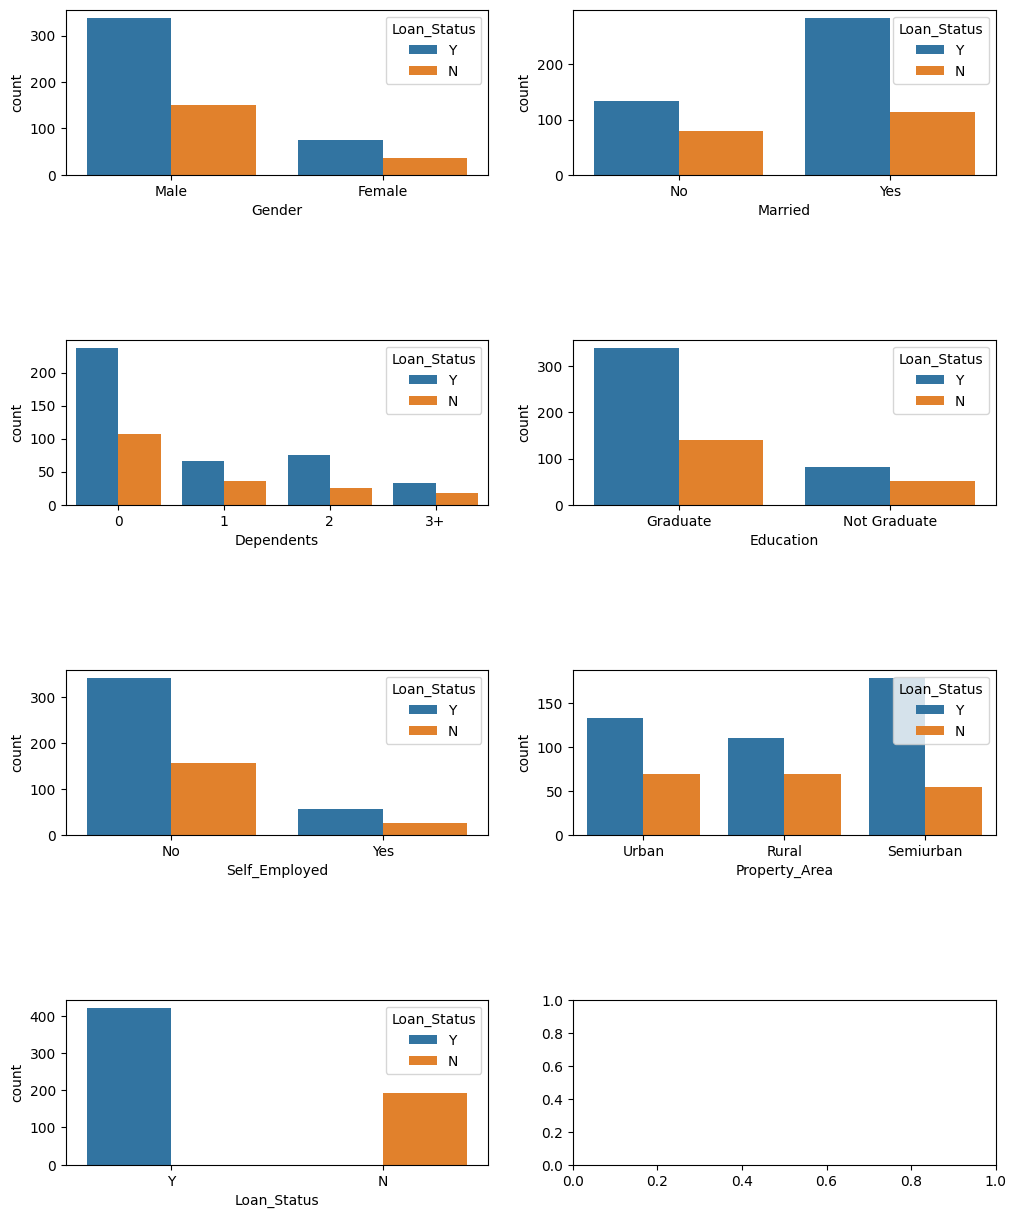

In [21]:
fig,axes = plt.subplots(4,2,figsize=(12,15))
for idx,cat_col in enumerate(cat_features):
    row,col = idx//2,idx%2
    sns.countplot(x=cat_col,data=df,hue='Loan_Status',ax=axes[row,col])

plt.subplots_adjust(hspace=1)

In [33]:
df["Credit_History"].value_counts()

Credit_History
1.0    475
0.0     89
Name: count, dtype: int64

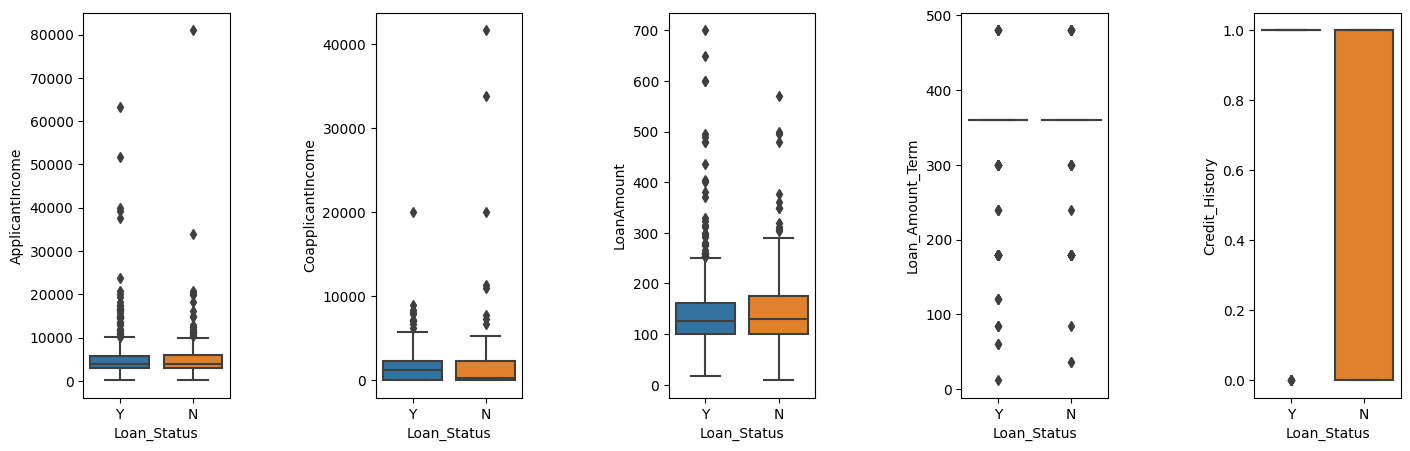

In [35]:
fig,axes = plt.subplots(1,5,figsize=(17,5))
for idx,cat_col in enumerate(num_features):
    sns.boxplot(y=cat_col,data=df,x='Loan_Status',ax=axes[idx])

plt.subplots_adjust(wspace=1)

2 Preprocessing Data

In [36]:
#### Encoding categrical Features: ##########
df_encoded = pd.get_dummies(df,drop_first=True)
df_encoded.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y
0,5849,0.0,NaN,360.0,1.0,True,False,False,False,False,False,False,False,True,True
1,4583,1508.0,128.0,360.0,1.0,True,True,True,False,False,False,False,False,False,False
2,3000,0.0,66.0,360.0,1.0,True,True,False,False,False,False,True,False,True,True
3,2583,2358.0,120.0,360.0,1.0,True,True,False,False,False,True,False,False,True,True
4,6000,0.0,141.0,360.0,1.0,True,False,False,False,False,False,False,False,True,True


In [41]:
########## Split Features and Target Varible ############
X = df_encoded.drop(columns='Loan_Status_Y')
y = df_encoded['Loan_Status_Y']

################# Splitting into Train -Test Data #######
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,stratify =y,random_state =42)
############### Handling/Imputing Missing values #############
from sklearn.impute import SimpleImputer
imp = SimpleImputer(strategy='mean')
imp_train = imp.fit(X_train)
X_train= imp_train.transform(X_train)
X_test_imp = imp_train.transform(X_test)

Model 1 DecisionTree

In [42]:
tree_clf = DecisionTreeClassifier()
tree_clf.fit(X_train,y_train)
y_pred = tree_clf.predict(X_train)
print("Training Data Set Accuracy: ", accuracy_score(y_train,y_pred))
print("Training Data F1 Score ", f1_score(y_train,y_pred))

print("Validation Mean F1 Score: ",cross_val_score(tree_clf,X_train,y_train,cv=5,scoring='f1_macro').mean())
print("Validation Mean Accuracy: ",cross_val_score(tree_clf,X_train,y_train,cv=5,scoring='accuracy').mean())

Training Data Set Accuracy:  1.0
Training Data F1 Score  1.0
Validation Mean F1 Score:  0.6483836751038783
Validation Mean Accuracy:  0.7046588332302617


 Decision Tree Tunning
 - Decision tree Overfitting 

<Axes: xlabel='Max_Depth', ylabel='Values'>

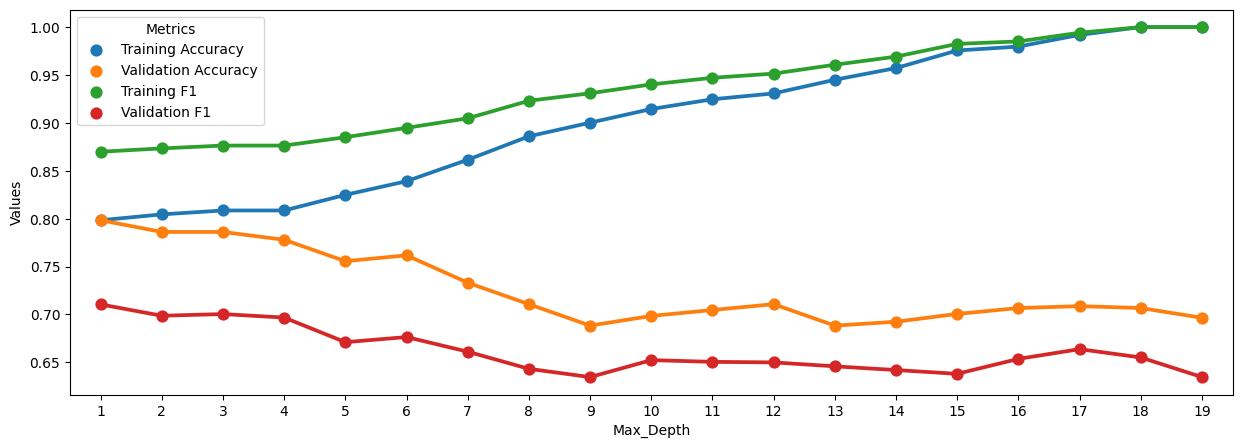

In [43]:
training_accuracy = []
val_accuracy = []
training_f1 = []
val_f1 = []
tree_depths = []

for depth in range(1,20):
    tree_clf = DecisionTreeClassifier(max_depth=depth)
    tree_clf.fit(X_train,y_train)
    y_training_pred = tree_clf.predict(X_train)

    training_acc = accuracy_score(y_train,y_training_pred)
    train_f1 = f1_score(y_train,y_training_pred)
    val_mean_f1 = cross_val_score(tree_clf,X_train,y_train,cv=5,scoring='f1_macro').mean()
    val_mean_accuracy = cross_val_score(tree_clf,X_train,y_train,cv=5,scoring='accuracy').mean()
    
    training_accuracy.append(training_acc)
    val_accuracy.append(val_mean_accuracy)
    training_f1.append(train_f1)
    val_f1.append(val_mean_f1)
    tree_depths.append(depth)
    

Tuning_Max_depth = {"Training Accuracy": training_accuracy, "Validation Accuracy": val_accuracy, "Training F1": training_f1, "Validation F1":val_f1, "Max_Depth": tree_depths }
Tuning_Max_depth_df = pd.DataFrame.from_dict(Tuning_Max_depth)

plot_df = Tuning_Max_depth_df.melt('Max_Depth',var_name='Metrics',value_name="Values")
fig,ax = plt.subplots(figsize=(15,5))
sns.pointplot(x="Max_Depth", y="Values",hue="Metrics", data=plot_df,ax=ax)

From above graph, we can conclude that keeping 'Max_Depth' = 3 will yield optimum Test accuracy and F1 score Optimum Test Accuracy ~ 0.805; Optimum F1 Score: ~0.7

In [ ]:
# Visualizing Decision Tree with Max Depth = 3

import graphviz 
from sklearn import tree

tree_clf = tree.DecisionTreeClassifier(max_depth = 3)
tree_clf.fit(X_train,y_train)
dot_data = tree.export_graphviz(tree_clf,feature_names = X.columns.tolist())
graph = graphviz.Source(dot_data)
graph

<Axes: xlabel='Min_Samples_leaf', ylabel='Values'>

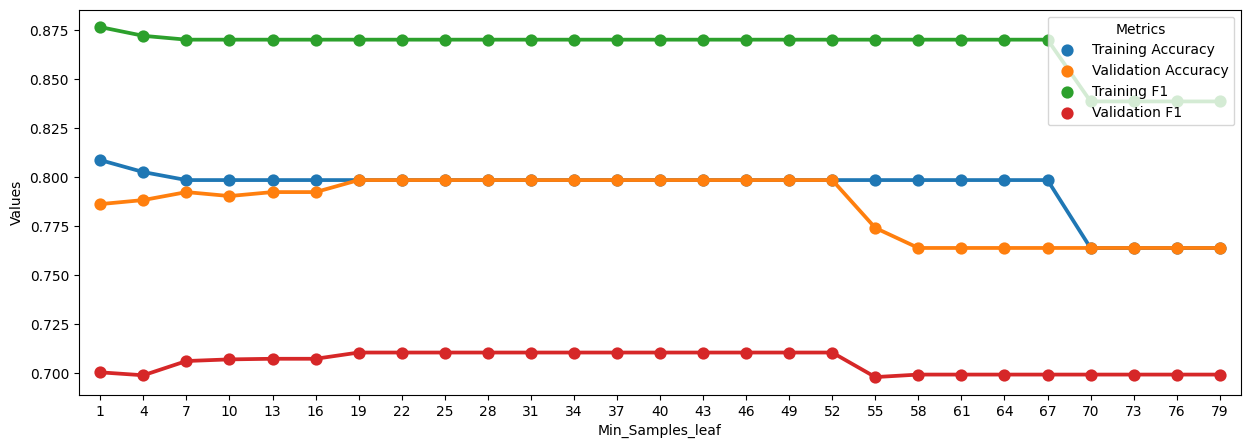

In [49]:
# sweep hyper-parameter 'min_samples_leaf' to further improve test accuracy by keeping max_depth to 3
training_accuracy = []
val_accuracy = []
training_f1 = []
val_f1 = []
min_samples_leaf = []
import numpy as np
for samples_leaf in range(1,80,3): ### Sweeping from 1% samples to 10% samples per leaf 
    tree_clf = DecisionTreeClassifier(max_depth=3,min_samples_leaf = samples_leaf)
    tree_clf.fit(X_train,y_train)
    y_training_pred = tree_clf.predict(X_train)

    training_acc = accuracy_score(y_train,y_training_pred)
    train_f1 = f1_score(y_train,y_training_pred)
    val_mean_f1 = cross_val_score(tree_clf,X_train,y_train,cv=5,scoring='f1_macro').mean()
    val_mean_accuracy = cross_val_score(tree_clf,X_train,y_train,cv=5,scoring='accuracy').mean()
    
    training_accuracy.append(training_acc)
    val_accuracy.append(val_mean_accuracy)
    training_f1.append(train_f1)
    val_f1.append(val_mean_f1)
    min_samples_leaf.append(samples_leaf)
    

Tuning_min_samples_leaf = {"Training Accuracy": training_accuracy, "Validation Accuracy": val_accuracy, "Training F1": training_f1, "Validation F1":val_f1, "Min_Samples_leaf": min_samples_leaf }
Tuning_min_samples_leaf_df = pd.DataFrame.from_dict(Tuning_min_samples_leaf)

plot_df = Tuning_min_samples_leaf_df.melt('Min_Samples_leaf',var_name='Metrics',value_name="Values")
fig,ax = plt.subplots(figsize=(15,5))
sns.pointplot(x="Min_Samples_leaf", y="Values",hue="Metrics", data=plot_df,ax=ax)

In [55]:
#  Min_Samples_leaf to 35 to improve test accuracy.

tree_clf = DecisionTreeClassifier(max_depth=3,min_samples_leaf = 35)
tree_clf.fit(X_train,y_train)
y_pred = tree_clf.predict(X_test_imp)
print("Test Accuracy: ",accuracy_score(y_test,y_pred))
print("Test F1 Score: ",f1_score(y_test,y_pred))
print("Confusion Matrix on Test Data")
pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'], margins=True)

Test Accuracy:  0.8536585365853658
Test F1 Score:  0.903225806451613
Confusion Matrix on Test Data


Predicted,False,True,All
Actual,,,
False,21,17,38
True,1,84,85
All,22,101,123


Mis-classifications
- It can be seen that majority of the misclassifications are happening because of Loan Reject applicants being classified as Accept.

Let's look into Random Forest Classifier if it can reduce mis-classifications

Model 2 RandomForestClassifier

In [56]:
rf_clf = RandomForestClassifier(n_estimators=100,max_depth=3,min_samples_leaf = 10)
rf_clf.fit(X_train,y_train)
y_pred = rf_clf.predict(X_train)
print("Train F1 Score ", f1_score(y_train,y_pred))
print("Train Accuracy ", accuracy_score(y_train,y_pred))

print("Validation Mean F1 Score: ",cross_val_score(rf_clf,X_train,y_train,cv=5,scoring='f1_macro').mean())
print("Validation Mean Accuracy: ",cross_val_score(rf_clf,X_train,y_train,cv=5,scoring='accuracy').mean())

Train F1 Score  0.8699080157687253
Train Accuracy  0.7983706720977597
Validation Mean F1 Score:  0.6718516413607821
Validation Mean Accuracy:  0.7963306534735106


In [58]:
y_pred = rf_clf.predict(X_test_imp)
print("Test Accuracy: ",accuracy_score(y_test,y_pred))
print("Test F1 Score: ",f1_score(y_test,y_pred))
print("Confusion Matrix on Test Data")
pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'], margins=True)

Test Accuracy:  0.8536585365853658
Test F1 Score:  0.903225806451613
Confusion Matrix on Test Data


Predicted,False,True,All
Actual,,,
False,21,17,38
True,1,84,85
All,22,101,123


Model 3 LogisticRegression

<Axes: xlabel='Decision Threshold', ylabel='Values'>

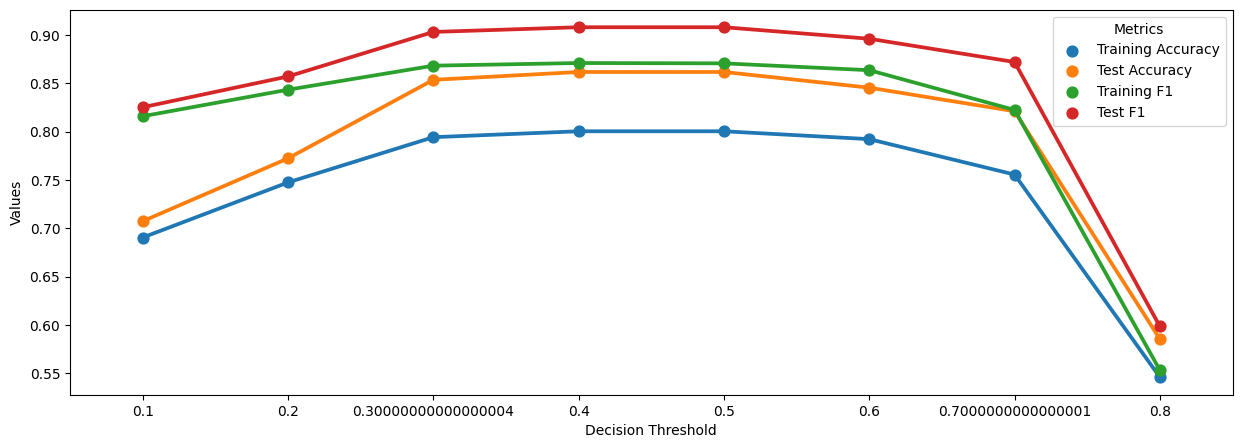

In [59]:
from sklearn.model_selection import cross_val_predict

train_accuracies = []
train_f1_scores = []
test_accuracies = []
test_f1_scores = []
thresholds = []

#for thresh in np.linspace(0.1,0.9,8): ## Sweeping from threshold of 0.1 to 0.9
for thresh in np.arange(0.1,0.9,0.1): ## Sweeping from threshold of 0.1 to 0.9
    logreg_clf = LogisticRegression(solver='liblinear')
    logreg_clf.fit(X_train,y_train)
    
    y_pred_train_thresh = logreg_clf.predict_proba(X_train)[:,1]
    y_pred_train = (y_pred_train_thresh > thresh).astype(int)

    train_acc = accuracy_score(y_train,y_pred_train)
    train_f1 = f1_score(y_train,y_pred_train)
    
    y_pred_test_thresh = logreg_clf.predict_proba(X_test_imp)[:,1]
    y_pred_test = (y_pred_test_thresh > thresh).astype(int) 
    
    test_acc = accuracy_score(y_test,y_pred_test)
    test_f1 = f1_score(y_test,y_pred_test)
    
    train_accuracies.append(train_acc)
    train_f1_scores.append(train_f1)
    test_accuracies.append(test_acc)
    test_f1_scores.append(test_f1)
    thresholds.append(thresh)
    
    
Threshold_logreg = {"Training Accuracy": train_accuracies, "Test Accuracy": test_accuracies, "Training F1": train_f1_scores, "Test F1":test_f1_scores, "Decision Threshold": thresholds }
Threshold_logreg_df = pd.DataFrame.from_dict(Threshold_logreg)

plot_df = Threshold_logreg_df.melt('Decision Threshold',var_name='Metrics',value_name="Values")
fig,ax = plt.subplots(figsize=(15,5))
sns.pointplot(x="Decision Threshold", y="Values",hue="Metrics", data=plot_df,ax=ax)

Logistic Regression does slightly better than Decision Tree and Random Forest.
Based on the above Test/Train curves, we can keep threshold to 0.4.
Now Finally let's look at Logistic Regression Confusion Matrix

In [61]:
thresh = 0.4 ### Threshold chosen from above Curves
y_pred_test_thresh = logreg_clf.predict_proba(X_test_imp)[:,1]
y_pred = (y_pred_test_thresh > thresh).astype(int) 
print("Test Accuracy: ",accuracy_score(y_test,y_pred))
print("Test F1 Score: ",f1_score(y_test,y_pred))
print("Confusion Matrix on Test Data")
pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Test Accuracy:  0.8617886178861789
Test F1 Score:  0.9081081081081082
Confusion Matrix on Test Data


Predicted,0,1,All
True,,,
False,22,16,38
True,1,84,85
All,23,100,123


In [25]:
import pandas as pd
df = pd.read_csv(r'C:\Users\arunk\Assignments\ASSESSMENT COMPLETION\Machine_learning_Assessment\encoded_X_train.csv')
df.isnull().sum()

Unnamed: 0                  0
ApplicantIncome             0
CoapplicantIncome           0
LoanAmount                 20
Loan_Amount_Term           12
Credit_History             43
Gender_Male                 0
Married_Yes                 0
Dependents_1                0
Dependents_2                0
Dependents_3+               0
Education_Not Graduate      0
Self_Employed_Yes           0
Property_Area_Semiurban     0
Property_Area_Urban         0
dtype: int64

In [26]:
import pandas as pd
df = pd.read_csv(r'C:\Users\arunk\Assignments\ASSESSMENT COMPLETION\Machine_learning_Assessment\Answer_6\train.csv')
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [29]:
df[["LoanAmount", "Loan_Amount_Term", "Credit_History"]]

,LoanAmount,Loan_Amount_Term,Credit_History
0,NaN,360.0,1.0
1,128.0,360.0,1.0
2,66.0,360.0,1.0
3,120.0,360.0,1.0
4,141.0,360.0,1.0
...,...,...,...
609,71.0,360.0,1.0
610,40.0,180.0,1.0
611,253.0,360.0,1.0
612,187.0,360.0,1.0


In [32]:
from sklearn.impute import SimpleImputer
imp = SimpleImputer(strategy="mean")
df1 = df[["LoanAmount", "Loan_Amount_Term", "Credit_History"]]
imp_train = imp.fit(df1)
X_train = imp_train.transform(df1)
X_train.is_na

array([[146.41216216, 360.        ,   1.        ],
       [128.        , 360.        ,   1.        ],
       [ 66.        , 360.        ,   1.        ],
       ...,
       [253.        , 360.        ,   1.        ],
       [187.        , 360.        ,   1.        ],
       [133.        , 360.        ,   0.        ]])